In [2]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
def order_book(month,day):
    data1 = []
    datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/stat_order_book/CNF14_0'+str(month)+'_'+str(day)+'_order_book_final.csv'
    data1 = pd.read_csv(datapath,sep='\t',encoding = 'utf-8')
    data_book = data1[['0','1','2','3']]
    return data_book

In [4]:
data_book = order_book(1,28)

In [5]:
data_book_open = data_book[213*4-3:67229*4+1]
data_book_open = data_book_open.reset_index(drop = True)

In [6]:
def day_time(month,day):
    data = []
    datapath = '/home/bigdatas16/SGX-OrderBook-Tick-Data-Trading-Strategy-/CN_Futures_2014.0'+str(month)+'.'+str(day)+'.csv'
    data = pd.read_csv(datapath)
    data_CNF14 = data[data.Series == 'CNF14']
    data = data_CNF14
    market_open_time = data[data['TimeStamp'].str.contains('2014-0'+str(month)+'-'+str(day)+'D09:00')].index.tolist()[0] 
    market_close_time = data[data['TimeStamp'].str.contains('2014-0'+str(month)+'-'+str(day)+'D16:00')].index.tolist()[0] 
    data_open = data[market_open_time:market_close_time+1]
    timestamp_ = data_open.TimeStamp.unique()
    return timestamp_

In [7]:
timestamp_time = day_time(1,28)

In [8]:
def time_transform(timestamp_time):
    time_second = []
    for i in range(0,len(timestamp_time),1):
        second = float(timestamp_time[i][11])*36000 + float(timestamp_time[i][12])*3600 \
                +float(timestamp_time[i][14])*600 + float(timestamp_time[i][15])*60\
                +float(timestamp_time[i][17])*10 + float(timestamp_time[i][18])  
        time_second.append(second - 32400.0)
    return  time_second

In [9]:
timestamp_time_second = time_transform(timestamp_time)

In [10]:
len(unique(timestamp_time_second))

12050

In [11]:
12*60*7

5040

In [12]:
order_submission_ = [i for i in range(0,25200,1)]

In [13]:
len(timestamp_time_second)

67017

In [29]:
timestamp_time_second[67016]

25200.0

In [ ]:
np.where(order_submission_[])

In [32]:
#order_submission_

In [44]:
a = [0,1,1,1,3,3,3,5,5,5,5,7,8,9]
b = [0,1,2,3,4,5,6,7,8,9]

In [45]:
np.where(array(a[:3]) <= b[3])[0][2]

2

In [35]:
a[:3]

[0, 1, 3]

In [37]:
b[3]

3

In [10]:
def bid123_ask123_Q(data_book_28_open):
    Bid1 = []
    Bid2 = []
    Bid3 = []
    Bid1_Quantity = []
    Bid2_Quantity = []
    Bid3_Quantity = []
    Ask1 = []
    Ask2 = []
    Ask3 = []
    Ask1_Quantity = []
    Ask2_Quantity = []
    Ask3_Quantity = []

    TimeStamp = []
    for i in range(1,len(data_book_28_open),4):
        #print data_book_28_open.iloc[i]['0']
        #print data_book_28_open.iloc[i]['2']
        Bid1.append(float(data_book_28_open.iloc[i]['0'])/100.0)
        Bid1_Quantity.append(float(data_book_28_open.iloc[i]['1']))

        Bid2.append(float(data_book_28_open.iloc[i + 1]['0'])/100.0)
        Bid2_Quantity.append(float(data_book_28_open.iloc[i + 1]['1']))  

        Bid3.append(float(data_book_28_open.iloc[i + 2]['0'])/100.0)
        Bid3_Quantity.append(float(data_book_28_open.iloc[i + 2]['1']))  

        Ask1.append(float(data_book_28_open.iloc[i]['2'])/100.0) 
        Ask1_Quantity.append(float(data_book_28_open.iloc[i]['3']))

        Ask2.append(float(data_book_28_open.iloc[i + 1]['2'])/100.0) 
        Ask2_Quantity.append(float(data_book_28_open.iloc[i + 1]['3']))    

        Ask3.append(float(data_book_28_open.iloc[i + 2]['2'])/100.0) 
        Ask3_Quantity.append(float(data_book_28_open.iloc[i + 2]['3']))    
        TimeStamp.append(data_book_28_open.iloc[i-1][1])
    return Bid1,Bid1_Quantity,Bid2,Bid2_Quantity,Bid3,Bid3_Quantity,Ask1,Ask1_Quantity,Ask2,Ask2_Quantity,Ask3,Ask3_Quantity,    

In [12]:
import time 
start = time.time()
Bid1,Bid1_Quantity,Bid2,Bid2_Quantity,Bid3,Bid3_Quantity,Ask1,Ask1_Quantity,Ask2,Ask2_Quantity,Ask3,Ask3_Quantity = bid123_ask123_Q(data_book_open)
end = time.time()  
print "Total time = %f"%(end - start)

Total time = 130.490071


In [13]:
import time 
start = time.time()
min_Ask1_time_series = []
min_Ask1_time_series.append(0)
for i in range(1,len(Ask1),1):
    min_Ask1_time_series.append(min(Ask1[i:]))
    
#max_Bid1_time_series = []
#max_Bid1_time_series.append(0)
#for i in range(1,len(Ask1),1):
#    max_Bid1_time_series.append(max(Bid1[i:]))
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 147.373901


In [14]:
def rise_ask(Ask1,timestamp_time_second):
    rise_ratio = []
    for i in range(0,600):
        rise_ratio_ = round((Ask1[i] - Ask1[0])*(1.0)/Ask1[0]*100,5)
        rise_ratio.append(rise_ratio_)
    for i in range(600,len(Ask1),1):
        index_start = np.where(np.array(timestamp_time_second[:i]) >= timestamp_time_second[i] - 600)[0][0]
        rise_ratio_ = round((Ask1[i] - Ask1[index_start])*(1.0)/Ask1[index_start]*100,5)
        rise_ratio.append(rise_ratio_)
    return rise_ratio

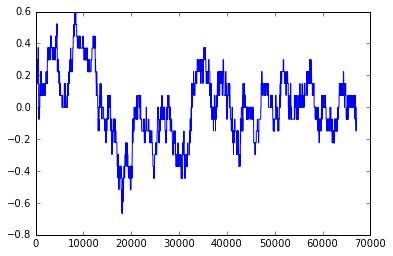

In [248]:
#plot(rise_ratio_ask)

In [26]:
np.where(np.array(timestamp_time_second[200:]) >= timestamp_time_second[200] + 900)

(array([ 1931,  1932,  1933, ..., 66814, 66815, 66816]),)

In [41]:
#timestamp_time_second[200]+900,
timestamp_time_second[(200+1931):][0]#[0]#[1931]

987.0

In [15]:
import time 
start = time.time()
rise_ratio_ask = rise_ask(Ask1,timestamp_time_second)
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 99.017123


In [19]:
def rise_bid(Bid1,timestamp_time_second):
    rise_ratio = []
    for i in range(0,600):
        rise_ratio_ = round((Bid1[i] - Bid1[0])*(1.0)/Bid1[0]*100,5)
        rise_ratio.append(rise_ratio_)
    for i in range(600,len(Bid1),1):
        index_start = np.where(np.array(timestamp_time_second[:i]) >= timestamp_time_second[i] - 600)[0][0]
        rise_ratio_ = round((Bid1[i] - Bid1[index_start])*(1.0)/Bid1[index_start]*100,5)
        rise_ratio.append(rise_ratio_)
    return rise_ratio

In [20]:
import time 
start = time.time()
rise_ratio_bid = rise_bid(Bid1,timestamp_time_second)
end = time.time()  
print "Total time = %f"%(end - start) 

Total time = 90.770868


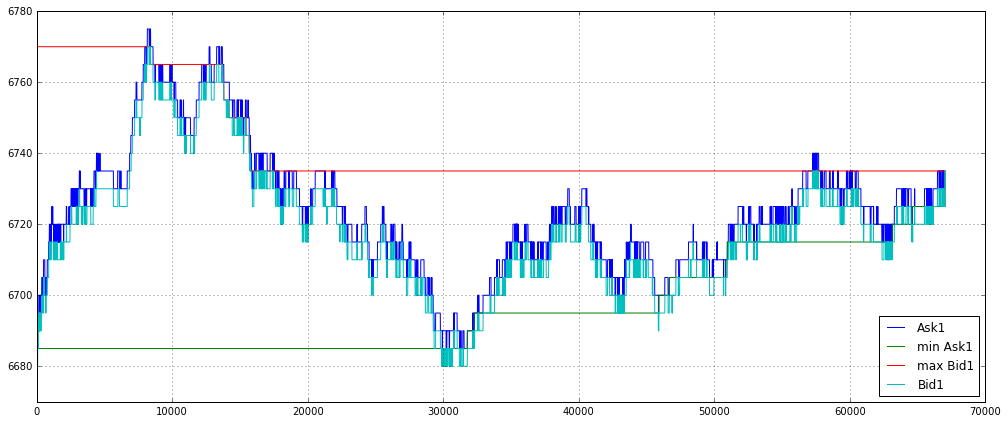

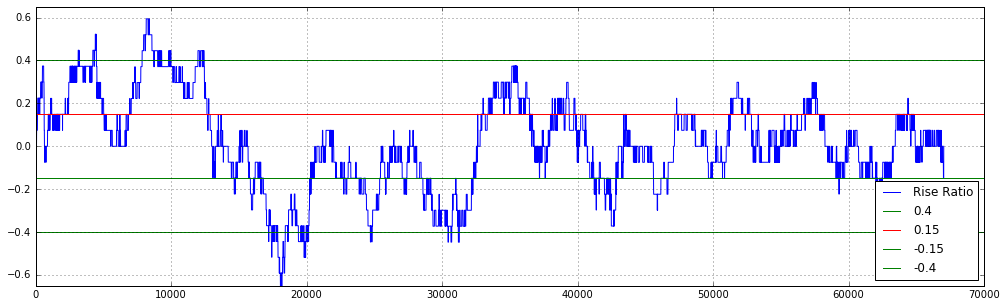

In [266]:
import matplotlib.pyplot as plt
plt.figure(figsize = (17,7))
plt.grid()
plot(Ask1[0:len(Ask1)],label = 'Ask1')
#plot(Ask2[0:len(Ask1)],label = 'Ask2')
#plot(Ask3[0:data_trade_time_series_1530_1600],label = 'Ask3')
plot(min_Ask1_time_series[0:len(Ask1)],label = 'min Ask1')
plot(max_Bid1_time_series[0:len(Ask1)],label = 'max Bid1')

plot(Bid1[0:len(Ask1)],label = 'Bid1')
#plot(Bid2[0:len(Ask1)],label = 'Bid2')
#plot(Bid3[0:data_trade_time_series_1530_1600],label = 'Bid3')
plt.ylim(6670,6780)
plt.legend(loc = 4)
plt.figure(figsize = (17,5))
plt.grid()
plot(rise_ratio_ask,label = 'Rise Ratio')

plt.axhline(0.4,color = 'g',linestyle = '-',label = 0.4)
plt.axhline(0.15,color = 'r',linestyle = '-',label = 0.15)
plt.axhline(-0.15,color = 'g',linestyle = '-',label = -0.15)
plt.axhline(-0.4,color = 'g',linestyle = '-',label = -0.4)
plt.ylim(-0.65,0.65)
plt.legend(loc = 4)


In [16]:
weight1 = 0.50
weight2 = 0.30
weight3 = 0.20

In [113]:
bidw = array(Bid1_Quantity) * weight1 + array(Bid2_Quantity) * weight2 + array(Bid3_Quantity) * weight3
askw = array(Ask1_Quantity) * weight1 + array(Ask2_Quantity) * weight2 + array(Ask3_Quantity) * weight3

In [473]:
#hist(bidw/askw,bins=150)

In [474]:
#hist(bidw-askw,bins=150)

In [475]:
#hist(log(bidw/askw),bins=150)

In [198]:
def rise_cal(rise_ratio_ask,min_Ask1_time_series,Bid,index,\
             N_1,N_2,N_3,N_4,N_5,N_1_T,N_2_T,N_3_T,N_4_T,N_5_T,\
             N_1_E,N_2_E,N_3_E,N_4_E,N_5_E):
    
    if rise_ratio_ask[index] <= -0.4:
        N_1 = N_1 + 1
        #print rise_ratio_ask[index]
        if Bid1[index] > min_Ask1_time_series[index+1]:
            N_1_T = N_1_T + 1
            N_1_E = N_1_E + (Ask1[index] - Bid1[index])*(1.0)/(5.0)
            #print 1
            #print N_1_T
            pass

        else:
            
            #print 2
            pass

    elif -0.4 < rise_ratio_ask[index] <= -0.15:
        N_2 = N_2 + 1
        #print rise_ratio_ask[index]
        if Bid1[index] > min_Ask1_time_series[index+1]:
            #print 3
            N_2_T = N_2_T + 1
            N_2_E = N_2_E + (Ask1[index] - Bid1[index])*(1.0)/(5.0)
            #print N_2_T
            pass
        else:
            #print 4
            pass

    elif -0.15 < rise_ratio_ask[index] <= 0.15:
        N_3 = N_3 + 1
        #print rise_ratio_ask[index]
        if Bid1[index] > min_Ask1_time_series[index+1]:
            #print 5
            N_3_T = N_3_T + 1
            N_3_E = N_3_E + (Ask1[index] - Bid1[index])*(1.0)/(5.0)
            #print N_3_T
            pass
        else:
            #print 6
            pass

    elif 0.15 < rise_ratio_ask[index] < 0.4:
        N_4 = N_4 + 1
        #print rise_ratio_ask[index]
        if Bid1[index] > min_Ask1_time_series[index+1]:
            #print 7
            N_4_T = N_4_T + 1
            N_4_E = N_4_E + (Ask1[index] - Bid1[index])*(1.0)/(5.0)
            #print N_4_T
            pass
        else:
            #print 8
            pass

    elif 0.4 <= rise_ratio_ask[index]:
        N_5 = N_5 + 1
        #print rise_ratio_ask[index]
        if Bid1[index] > min_Ask1_time_series[index+1]:
            N_5_T = N_5_T + 1
            N_5_E = N_5_E + (Ask1[index] - Bid1[index])*(1.0)/(5.0)
            #print N_5_T            
            #print 9
            pass

        else:
            #print 10  
            pass
    return N_1,N_2,N_3,N_4,N_5,N_1_T,N_2_T,N_3_T,N_4_T,N_5_T,N_1_E,N_2_E,N_3_E,N_4_E,N_5_E

In [147]:
[N_11,N_12,N_13,N_14,N_15,N_11_T,N_12_T,N_13_T,N_14_T,N_15_T] = [0 for i in  range(0,10,1)]
N_11,N_12,N_13,N_14,N_15,N_11_T,N_12_T,N_13_T,N_14_T,N_15_T

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

In [35]:
np.where(np.array(timestamp_time_second[200:]) >= timestamp_time_second[200] + 900)[0][0]

1931

In [476]:
timestamp_time_second[10000]

2375.0

In [477]:
Bid = Bid1
[N_11,N_12,N_13,N_14,N_15,N_11_T,N_12_T,N_13_T,N_14_T,N_15_T,N_11_E,N_12_E,N_13_E,N_14_E,N_15_E] = \
[0 for i in  range(0,15,1)]
[N_21,N_22,N_23,N_24,N_25,N_21_T,N_22_T,N_23_T,N_24_T,N_25_T,N_21_E,N_22_E,N_23_E,N_24_E,N_25_E] = \
[0 for i in  range(0,15,1)]
[N_31,N_32,N_33,N_34,N_35,N_31_T,N_32_T,N_33_T,N_34_T,N_35_T,N_31_E,N_32_E,N_33_E,N_34_E,N_35_E] = \
[0 for i in  range(0,15,1)]
[N_41,N_42,N_43,N_44,N_45,N_41_T,N_42_T,N_43_T,N_44_T,N_45_T,N_41_E,N_42_E,N_43_E,N_44_E,N_45_E] = \
[0 for i in  range(0,15,1)]
[N_51,N_52,N_53,N_54,N_55,N_51_T,N_52_T,N_53_T,N_54_T,N_55_T,N_51_E,N_52_E,N_53_E,N_54_E,N_55_E] = \
[0 for i in  range(0,15,1)]

for i in range(2000,2400,1):
    #print i
    #print np.where(array(timestamp_time_second) <= i)[0]
    index = np.where(array(timestamp_time_second) <= i)[0][-1]
    index_15_min = np.where(np.array(timestamp_time_second[i:]) >= timestamp_time_second[i] + 900)[0][0]
    #print 'time stamp = %d'%(timestamp_time_second[index])
    #print index
    #print Bid1[index]
    #print Ask1[index]
    #print min_Ask1_time_series[index + 1]
    weighted_Bid = Bid1_Quantity[index] * weight1 + Bid2_Quantity[index] * weight2 + Bid3_Quantity[index] * weight3
    weighted_Ask = Ask1_Quantity[index] * weight1 + Ask2_Quantity[index] * weight2 + Ask3_Quantity[index] * weight3  
    #print weighted_Bid 
    #print weighted_Ask
    #print (weighted_Bid*(1.0) / weighted_Ask)
    
    if (weighted_Bid*(1.0) / weighted_Ask) <= 0.7:
        N_11,N_12,N_13,N_14,N_15,N_11_T,N_12_T,N_13_T,N_14_T,N_15_T,N_11_E,N_12_E,N_13_E,N_14_E,N_15_E = \
        rise_cal(rise_ratio_ask,min_Ask1_time_series,Bid,index,index_15_min,N_11,N_12,N_13,N_14,N_15,N_11_T,N_12_T,N_13_T,N_14_T,N_15_T,N_11_E,N_12_E,N_13_E,N_14_E,N_15_E)                                               

    elif 0.7 < (weighted_Bid*(1.0) / weighted_Ask) <= 0.9:
        N_21,N_22,N_23,N_24,N_25,N_21_T,N_22_T,N_23_T,N_24_T,N_25_T,N_21_E,N_22_E,N_23_E,N_24_E,N_25_E = \
        rise_cal(rise_ratio_ask,min_Ask1_time_series,Bid,index,index_15_min,N_21,N_22,N_23,N_24,N_25,N_21_T,N_22_T,N_23_T,N_24_T,N_25_T,N_21_E,N_22_E,N_23_E,N_24_E,N_25_E)                                                

    elif 0.9 < (weighted_Bid*(1.0) / weighted_Ask) <= 1.1:
        N_31,N_32,N_33,N_34,N_35,N_31_T,N_32_T,N_33_T,N_34_T,N_35_T,N_31_E,N_32_E,N_33_E,N_34_E,N_35_E = \
        rise_cal(rise_ratio_ask,min_Ask1_time_series,Bid,index,index_15_min,N_31,N_32,N_33,N_34,N_35,N_31_T,N_32_T,N_33_T,N_34_T,N_35_T,N_31_E,N_32_E,N_33_E,N_34_E,N_35_E)                                    
 
    elif 1.1 < (weighted_Bid*(1.0) / weighted_Ask) <= 1.3:
        N_41,N_42,N_43,N_44,N_45,N_41_T,N_42_T,N_43_T,N_44_T,N_45_T,N_41_E,N_42_E,N_43_E,N_44_E,N_45_E = \
        rise_cal(rise_ratio_ask,min_Ask1_time_series,Bid,index,index_15_min,N_41,N_42,N_43,N_44,N_45,N_41_T,N_42_T,N_43_T,N_44_T,N_45_T,N_41_E,N_42_E,N_43_E,N_44_E,N_45_E)                              

    elif 1.30 < (weighted_Bid*(1.0) / weighted_Ask):
        N_51,N_52,N_53,N_54,N_55,N_51_T,N_52_T,N_53_T,N_54_T,N_55_T,N_51_E,N_52_E,N_53_E,N_54_E,N_55_E = \
        rise_cal(rise_ratio_ask,min_Ask1_time_series,Bid,index,index_15_min,N_51,N_52,N_53,N_54,N_55,N_51_T,N_52_T,N_53_T,N_54_T,N_55_T,N_51_E,N_52_E,N_53_E,N_54_E,N_55_E)                   

TypeError: rise_cal() takes exactly 28 arguments (20 given)

In [85]:
len(timestamp_time_second)

67017

In [282]:
def rise_cal(i,rise_ratio_ask,timestamp_time_second,Bid,Ask,index,index_15_min,close_price,\
             N_1,N_2,N_3,N_4,N_5,N_1_T,N_2_T,N_3_T,N_4_T,N_5_T,\
             N_1_E,N_2_E,N_3_E,N_4_E,N_5_E,N_1_M,N_2_M,N_3_M,N_4_M,N_5_M):
    
    if rise_ratio_ask[index] <= -0.4:
        N_1 = N_1 + 1
        #print rise_ratio_ask[index]
        if Bid1[index] > min_Ask1_time_series[index+1]:
            N_1_T = N_1_T + 1
            N_1_E = N_1_E + (Ask1[index] - Bid1[index])*(1.0)/(5.0)
            #print N_1_E
            first_min_index = np.where(np.array(Ask1[(index+1):]) < Bid1[index])[0][0]
            N_1_M = N_1_M + (max(Ask1[(index + 1):(index + 1 + first_min_index)]) - Bid1[index])*(1.0)/(5.0) 
            print N_1_M
            pass

        else:
            if i < 25200 - 900:
                N_1_E = N_1_E + (Ask1[index] - Ask1[index + index_15_min])*(1.0)/(5.0)
                
            else:
                N_1_E = N_1_E + (Ask1[index] - close_price)*(1.0)/(5.0)
                
                #print N_1_E
            pass

    elif -0.4 < rise_ratio_ask[index] <= -0.15:
        N_2 = N_2 + 1
        #print rise_ratio_ask[index]
        if Bid1[index] > min_Ask1_time_series[index+1]:
            #print 3
            N_2_T = N_2_T + 1
            N_2_E = N_2_E + (Ask1[index] - Bid1[index])*(1.0)/(5.0)
            #print N_2_E
            first_min_index = np.where(np.array(Ask1[(index+1):]) < Bid1[index])[0][0]
            N_2_M = N_2_M + (max(Ask1[(index + 1):(index + 1 + first_min_index)]) - Bid1[index])*(1.0)/(5.0) 
            print N_2_M
            pass
        else:
            if i < 25200 - 900:
                N_2_E = N_2_E + (Ask1[index] - Ask1[index + index_15_min])*(1.0)/(5.0)
            else:
                N_2_E = N_2_E + (Ask1[index] - close_price)*(1.0)/(5.0)
                #print E
            pass

    elif -0.15 < rise_ratio_ask[index] <= 0.15:
        N_3 = N_3 + 1
        #print rise_ratio_ask[index]
        if Bid1[index] > min_Ask1_time_series[index+1]:
            #print 5
            N_3_T = N_3_T + 1
            N_3_E = N_3_E + (Ask1[index] - Bid1[index])*(1.0)/(5.0)
            #print N_3_E
            first_min_index = np.where(np.array(Ask1[(index+1):]) < Bid1[index])[0][0]
            N_3_M = N_3_M + (max(Ask1[(index + 1):(index + 1 + first_min_index)]) - Bid1[index])*(1.0)/(5.0) 
            print N_3_M
            pass
        else:
            if i < 25200 - 900:
                N_3_E = N_3_E + (Ask1[index] - Ask1[index + index_15_min])*(1.0)/(5.0)
            #print N_3_E
            else:
                N_3_E = N_3_E + (Ask1[index] - close_price)*(1.0)/(5.0)
                #print N_3_E
            pass

    elif 0.15 < rise_ratio_ask[index] < 0.4:
        N_4 = N_4 + 1
        #print rise_ratio_ask[index]
        if Bid1[index] > min_Ask1_time_series[index+1]:
            #print 7
            N_4_T = N_4_T + 1
            N_4_E = N_4_E + (Ask1[index] - Bid1[index])*(1.0)/(5.0)
            #print N_4_E
            first_min_index = np.where(np.array(Ask1[(index+1):]) < Bid1[index])[0][0]
            N_4_M = N_4_M + (max(Ask1[(index + 1):(index + 1 + first_min_index)]) - Bid1[index])*(1.0)/(5.0) 
            print N_4_M
            pass
        else:
            if i < 25200 - 900:
                N_4_E = N_4_E + (Ask1[index] - Ask1[index + index_15_min])*(1.0)/(5.0)
            #print N_4_E
            else:
                N_4_E = N_4_E + (Ask1[index] - close_price)*(1.0)/(5.0)
                #print N_3_E
            pass

    elif 0.4 <= rise_ratio_ask[index]:
        N_5 = N_5 + 1
        #print rise_ratio_ask[index]
        if Bid1[index] > min_Ask1_time_series[index+1]:
            N_5_T = N_5_T + 1
            N_5_E = N_5_E + (Ask1[index] - Bid1[index])*(1.0)/(5.0)
            #print N_5_E      
            first_min_index = np.where(np.array(Ask1[(index+1):]) < Bid1[index])[0][0]
            N_5_M = N_5_M + (max(Ask1[(index + 1):(index + 1 + first_min_index)]) - Bid1[index])*(1.0)/(5.0) 
            print N_5_M
            pass
        else:
            if i < 25200 - 900:
                N_5_E = N_5_E + (Ask1[index] - Ask1[index + index_15_min])*(1.0)/(5.0)
            else:
                N_5_E = N_5_E + (Ask1[index] - close_price)*(1.0)/(5.0)
                #print N_5_E  
            pass
    return N_1,N_2,N_3,N_4,N_5,N_1_T,N_2_T,N_3_T,N_4_T,N_5_T,N_1_E,N_2_E,N_3_E,N_4_E,N_5_E,N_1_M,N_2_M,N_3_M,N_4_M,N_5_M






In [190]:
def rise_cal(i,rise_ratio_ask,timestamp_time_second,Bid,Ask,index,index_15_min,close_price,\
             N_1,N_2,N_3,N_4,N_5,N_1_T,N_2_T,N_3_T,N_4_T,N_5_T,\
             N_1_E,N_2_E,N_3_E,N_4_E,N_5_E,N_1_M,N_2_M,N_3_M,N_4_M,N_5_M,\
             N_1_TI,N_2_TI,N_3_TI,N_4_TI,N_5_TI):
    
    if rise_ratio_ask[index] <= -0.4:
        N_1 = N_1 + 1
        #print rise_ratio_ask[index]
        if Bid1[index] > min(Ask1[(index+1):index + 1 + index_15_min + 1]):
            N_1_T = N_1_T + 1
            N_1_E = N_1_E + (Ask1[index] - Bid1[index])*(1.0)/(5.0)
            #print N_1_E
            first_min_index = np.where(np.array(Ask1[(index+1):index + 1 + index_15_min + 1]) < Bid1[index])[0][0]
            N_1_M = N_1_M + (max(Ask1[(index + 1):(index + 1 + first_min_index + 1)]) - Bid1[index])*(1.0)/(5.0) 
            
            time_start = timestamp_time_second[index]
            time_traded = timestamp_time_second[index + first_min_index + 1]
            N_1_TI = N_1_TI + (time_traded - time_start)
            #print N_1_TI
            pass

        else:
            if i < 25200 - 900:
                N_1_E = N_1_E + (Ask1[index] - Ask1[index + index_15_min])*(1.0)/(5.0)
                N_1_M = N_1_M + (max(Ask1[(index + 1):(index + 1 + index_15_min + 1)]) - Bid1[index])*(1.0)/(5.0) 
                #print N_1_M
                N_1_TI = N_1_TI + (900.0)
                #print N_1_TI
            else:
                N_1_E = N_1_E + (Ask1[index] - close_price)*(1.0)/(5.0)
                N_1_M = N_1_M + (max(Ask1[(index+1):]) - Bid1[index])*(1.0)/(5.0) 
                time_start = timestamp_time_second[index]
                time_traded = timestamp_time_second[len(timestamp_time_second)-1]                
                N_1_TI = N_1_TI + (time_traded - time_start)
                #print N_1_TI
            pass

    elif -0.4 < rise_ratio_ask[index] <= -0.15:
        N_2 = N_2 + 1
        #print rise_ratio_ask[index]
        if Bid1[index] > min(Ask1[(index+1):index + 1 + index_15_min + 1]):
            #print 3
            N_2_T = N_2_T + 1
            N_2_E = N_2_E + (Ask1[index] - Bid1[index])*(1.0)/(5.0)
            #print N_2_E
            first_min_index = np.where(np.array(Ask1[(index+1):index + 1 + index_15_min + 1]) < Bid1[index])[0][0]
            N_2_M = N_2_M + (max(Ask1[(index + 1):(index + 1 + first_min_index + 1)]) - Bid1[index])*(1.0)/(5.0) 
            
            time_start = timestamp_time_second[index]
            time_traded = timestamp_time_second[index + first_min_index + 1]
            N_2_TI = N_2_TI + (time_traded - time_start)
            #print N_2_TI
            pass
        else:
            if i < 25200 - 900:
                N_2_E = N_2_E + (Ask1[index] - Ask1[index + index_15_min])*(1.0)/(5.0)
                N_2_M = N_2_M + (max(Ask1[(index + 1):(index + 1 + index_15_min + 1)]) - Bid1[index])*(1.0)/(5.0) 
                N_2_TI = N_2_TI + (900.0)
                #print N_2_TI
            else:
                N_2_E = N_2_E + (Ask1[index] - close_price)*(1.0)/(5.0)
                N_2_M = N_3_M + (max(Ask1[(index+1):]) - Bid1[index])*(1.0)/(5.0)
                time_start = timestamp_time_second[index]
                time_traded = timestamp_time_second[len(timestamp_time_second)-1]                
                N_2_TI = N_2_TI + (time_traded - time_start)
                #print N_2_TI
            pass

    elif -0.15 < rise_ratio_ask[index] <= 0.15:
        N_3 = N_3 + 1
        #print rise_ratio_ask[index]
        if Bid1[index] > min(Ask1[(index+1):index + 1 + index_15_min + 1]):
            #print 5
            N_3_T = N_3_T + 1
            N_3_E = N_3_E + (Ask1[index] - Bid1[index])*(1.0)/(5.0)
            #print N_3_E
            first_min_index = np.where(np.array(Ask1[(index+1):index + 1 + index_15_min + 1]) < Bid1[index])[0][0]
            N_3_M = N_3_M + (max(Ask1[(index + 1):(index + 1 + first_min_index + 1)]) - Bid1[index])*(1.0)/(5.0) 
            time_start = timestamp_time_second[index]
            time_traded = timestamp_time_second[index + first_min_index + 1]
            N_3_TI = N_3_TI + (time_traded - time_start)
            #print N_3_TI
            pass
        else:
            if i < 25200 - 900:
                N_3_E = N_3_E + (Ask1[index] - Ask1[index + index_15_min])*(1.0)/(5.0)
                N_3_M = N_3_M + (max(Ask1[(index + 1):(index + 1 + index_15_min + 1)]) - Bid1[index])*(1.0)/(5.0) 
                N_3_TI = N_3_TI + (900.0)
                #print N_3_TI
            else:
                N_3_E = N_3_E + (Ask1[index] - close_price)*(1.0)/(5.0)
                N_3_M = N_3_M + (max(Ask1[(index+1):]) - Bid1[index])*(1.0)/(5.0)
                time_start = timestamp_time_second[index]
                time_traded = timestamp_time_second[len(timestamp_time_second)-1]                
                N_3_TI = N_3_TI + (time_traded - time_start)
                #print N_3_TI
            pass

    elif 0.15 < rise_ratio_ask[index] < 0.4:
        N_4 = N_4 + 1
        #print rise_ratio_ask[index]
        if Bid1[index] > min(Ask1[(index+1):index + 1 + index_15_min + 1]):
            #print 7
            N_4_T = N_4_T + 1
            N_4_E = N_4_E + (Ask1[index] - Bid1[index])*(1.0)/(5.0)
            #print N_4_E
            first_min_index = np.where(np.array(Ask1[(index+1):index + 1 + index_15_min + 1]) < Bid1[index])[0][0]
            N_4_M = N_4_M + (max(Ask1[(index + 1):(index + 1 + first_min_index + 1)]) - Bid1[index])*(1.0)/(5.0) 
            time_start = timestamp_time_second[index]
            time_traded = timestamp_time_second[index + first_min_index + 1]
            N_4_TI = N_4_TI + (time_traded - time_start)
            #print N_4_TI
            pass
        else:
            if i < 25200 - 900:
                N_4_E = N_4_E + (Ask1[index] - Ask1[index + index_15_min])*(1.0)/(5.0)
                N_4_M = N_4_M + (max(Ask1[(index + 1):(index + 1 + index_15_min + 1)]) - Bid1[index])*(1.0)/(5.0) 
                N_4_TI = N_4_TI + (900.0)
                #print N_4_TI
            else:
                N_4_E = N_4_E + (Ask1[index] - close_price)*(1.0)/(5.0)
                N_4_M = N_4_M + (max(Ask1[(index+1):]) - Bid1[index])*(1.0)/(5.0)
                time_start = timestamp_time_second[index]
                time_traded = timestamp_time_second[len(timestamp_time_second)-1]                
                N_4_TI = N_4_TI + (time_traded - time_start)
                #print N_4_TI
            pass

    elif 0.4 <= rise_ratio_ask[index]:
        N_5 = N_5 + 1
        #print rise_ratio_ask[index]
        if Bid1[index] > min(Ask1[(index+1):index + 1 + index_15_min + 1]):
            N_5_T = N_5_T + 1
            N_5_E = N_5_E + (Ask1[index] - Bid1[index])*(1.0)/(5.0)
            #print N_5_E      
            first_min_index = np.where(np.array(Ask1[(index+1):index + 1 + index_15_min + 1]) < Bid1[index])[0][0]
            N_5_M = N_5_M + (max(Ask1[(index + 1):(index + 1 + first_min_index + 1)]) - Bid1[index])*(1.0)/(5.0) 
            
            time_start = timestamp_time_second[index]
            time_traded = timestamp_time_second[index + first_min_index + 1]
            N_5_TI = N_5_TI + (time_traded - time_start)
            #print N_5_TI
            pass
        else:
            if i < 25200 - 900:
                N_5_E = N_5_E + (Ask1[index] - Ask1[index + index_15_min])*(1.0)/(5.0)
                N_5_M = N_5_M + (max(Ask1[(index + 1):(index + 1 + index_15_min + 1)]) - Bid1[index])*(1.0)/(5.0) 
                N_1_TI = N_1_TI + (900.0)
                #print N_5_TI
            else:
                N_5_E = N_5_E + (Ask1[index] - close_price)*(1.0)/(5.0)
                N_5_M = N_5_M + (max(Ask1[(index+1):]) - Bid1[index])*(1.0)/(5.0)
                time_start = timestamp_time_second[index]
                time_traded = timestamp_time_second[len(timestamp_time_second)-1]                
                N_5_TI = N_5_TI + (time_traded - time_start)
                #print N_5_TI 
            pass
        
    return N_1,N_2,N_3,N_4,N_5,N_1_T,N_2_T,N_3_T,N_4_T,N_5_T,N_1_E,N_2_E,N_3_E,N_4_E,N_5_E,N_1_M,N_2_M,N_3_M,N_4_M,N_5_M,\
           N_1_TI,N_2_TI,N_3_TI,N_4_TI,N_5_TI


In [311]:
#first_min_index = np.where(np.array(Ask1[(index+1):index + index_15_min]) < Bid1[index])[0][0]
#N_5_M = N_5_M + (max(Ask1[(index + 1):(index + 1 + first_min_index)]) - Bid1[index])*(1.0)/(5.0)

In [111]:
Bid = Bid1
Ask = Ask1
close_price = 6750
[N_11,N_12,N_13,N_14,N_15,N_11_T,N_12_T,N_13_T,N_14_T,N_15_T,N_11_E,N_12_E,N_13_E,N_14_E,N_15_E,\
 N_11_M,N_12_M,N_13_M,N_14_M,N_15_M,N_11_TI,N_12_TI,N_13_TI,N_14_TI,N_15_TI] = [0 for i in  range(0,25,1)]
[N_21,N_22,N_23,N_24,N_25,N_21_T,N_22_T,N_23_T,N_24_T,N_25_T,N_21_E,N_22_E,N_23_E,N_24_E,N_25_E,\
 N_21_M,N_22_M,N_23_M,N_24_M,N_25_M,N_21_TI,N_22_TI,N_23_TI,N_24_TI,N_25_TI] = [0 for i in  range(0,25,1)]
[N_31,N_32,N_33,N_34,N_35,N_31_T,N_32_T,N_33_T,N_34_T,N_35_T,N_31_E,N_32_E,N_33_E,N_34_E,N_35_E,\
 N_31_M,N_32_M,N_33_M,N_34_M,N_35_M,N_31_TI,N_32_TI,N_33_TI,N_34_TI,N_35_TI] = [0 for i in  range(0,25,1)]
[N_41,N_42,N_43,N_44,N_45,N_41_T,N_42_T,N_43_T,N_44_T,N_45_T,N_41_E,N_42_E,N_43_E,N_44_E,N_45_E,\
 N_41_M,N_42_M,N_43_M,N_44_M,N_45_M,N_41_TI,N_42_TI,N_43_TI,N_44_TI,N_45_TI] = [0 for i in  range(0,25,1)]
[N_51,N_52,N_53,N_54,N_55,N_51_T,N_52_T,N_53_T,N_54_T,N_55_T,N_51_E,N_52_E,N_53_E,N_54_E,N_55_E,\
 N_51_M,N_52_M,N_53_M,N_54_M,N_55_M,N_51_TI,N_52_TI,N_53_TI,N_54_TI,N_55_TI] = [0 for i in  range(0,25,1)]

for i in range(0,25200,1):
    #print i
    #print np.where(array(timestamp_time_second) <= i)[0]
    index = np.where(array(timestamp_time_second) <= i)[0][-1]
    #print i
    #print index
    #print timestamp_time_second[index]
    if i < 25200 - 900:
        index_15_min = np.where(np.array(timestamp_time_second[index:]) >= i + 900)[0][0]
        #print index_15_min
        #print timestamp_time_second[index+index_15_min]
    #print 'time stamp = %d'%(timestamp_time_second[index])
    #print index
    #print index + index_15_min 
    #rint Bid1[index]
    #print Ask1[index]
    #print len(Ask1[(index+1):index + index_15_min])
    
    #if Bid1[index] > min(Ask1[(index+1):index + index_15_min]):
    #    first_min_index = np.where(np.array(Ask1[(index+1):index + index_15_min]) < Bid1[index])[0][0]
    #    print 'mdd = %d'%((max(Ask1[(index + 1):(index + 1 + first_min_index)]) - Bid1[index])*(1.0)/(5.0))
    #print min_Ask1_time_series[index + 1]
    weighted_Bid = Bid1_Quantity[index] * weight1 + Bid2_Quantity[index] * weight2 + Bid3_Quantity[index] * weight3
    weighted_Ask = Ask1_Quantity[index] * weight1 + Ask2_Quantity[index] * weight2 + Ask3_Quantity[index] * weight3  
    #print weighted_Bid 
    #print weighted_Ask
    #print (weighted_Bid*(1.0) / weighted_Ask)
    
    if (weighted_Bid*(1.0) / weighted_Ask) <= 0.7:
        N_11,N_12,N_13,N_14,N_15,N_11_T,N_12_T,N_13_T,N_14_T,N_15_T,N_11_E,N_12_E,N_13_E,N_14_E,N_15_E,\
        N_11_M,N_12_M,N_13_M,N_14_M,N_15_M,N_11_TI,N_12_TI,N_13_TI,N_14_TI,N_15_TI = rise_cal(i,rise_ratio_ask,timestamp_time_second,Bid,Ask,index,index_15_min,\
                                                      close_price,N_11,N_12,N_13,N_14,N_15,N_11_T,N_12_T,N_13_T,N_14_T,N_15_T,\
                                                      N_11_E,N_12_E,N_13_E,N_14_E,N_15_E,N_11_M,N_12_M,N_13_M,N_14_M,N_15_M,\
                                                      N_11_TI,N_12_TI,N_13_TI,N_14_TI,N_15_TI)                                               

    elif 0.7 < (weighted_Bid*(1.0) / weighted_Ask) <= 0.9:
        N_21,N_22,N_23,N_24,N_25,N_21_T,N_22_T,N_23_T,N_24_T,N_25_T,N_21_E,N_22_E,N_23_E,N_24_E,N_25_E,\
        N_21_M,N_22_M,N_23_M,N_24_M,N_25_M,N_21_TI,N_22_TI,N_23_TI,N_24_TI,N_25_TI = rise_cal(i,rise_ratio_ask,timestamp_time_second,Bid,Ask,index,index_15_min,\
                                                      close_price,N_21,N_22,N_23,N_24,N_25,N_21_T,N_22_T,N_23_T,N_24_T,N_25_T,\
                                                      N_21_E,N_22_E,N_23_E,N_24_E,N_25_E,N_21_M,N_22_M,N_23_M,N_24_M,N_25_M,\
                                                      N_21_TI,N_22_TI,N_23_TI,N_24_TI,N_25_TI)                                                

    elif 0.9 < (weighted_Bid*(1.0) / weighted_Ask) <= 1.1:
        N_31,N_32,N_33,N_34,N_35,N_31_T,N_32_T,N_33_T,N_34_T,N_35_T,N_31_E,N_32_E,N_33_E,N_34_E,N_35_E,\
        N_31_M,N_32_M,N_33_M,N_34_M,N_35_M,N_31_TI,N_32_TI,N_33_TI,N_34_TI,N_35_TI = rise_cal(i,rise_ratio_ask,timestamp_time_second,Bid,Ask,index,index_15_min,\
                                                      close_price,N_31,N_32,N_33,N_34,N_35,N_31_T,N_32_T,N_33_T,N_34_T,N_35_T,\
                                                      N_31_E,N_32_E,N_33_E,N_34_E,N_35_E,N_31_M,N_32_M,N_33_M,N_34_M,N_35_M,\
                                                      N_31_TI,N_32_TI,N_33_TI,N_34_TI,N_35_TI)                                    
 
    elif 1.1 < (weighted_Bid*(1.0) / weighted_Ask) <= 1.3:
        N_41,N_42,N_43,N_44,N_45,N_41_T,N_42_T,N_43_T,N_44_T,N_45_T,N_41_E,N_42_E,N_43_E,N_44_E,N_45_E,\
        N_41_M,N_42_M,N_43_M,N_44_M,N_45_M,N_41_TI,N_42_TI,N_43_TI,N_44_TI,N_45_TI = rise_cal(i,rise_ratio_ask,timestamp_time_second,Bid,Ask,index,index_15_min,\
                                                      close_price,N_41,N_42,N_43,N_44,N_45,N_41_T,N_42_T,N_43_T,N_44_T,N_45_T,\
                                                      N_41_E,N_42_E,N_43_E,N_44_E,N_45_E,N_41_M,N_42_M,N_43_M,N_44_M,N_45_M,\
                                                      N_41_TI,N_42_TI,N_43_TI,N_44_TI,N_45_TI)                              

    elif 1.30 < (weighted_Bid*(1.0) / weighted_Ask):
        N_51,N_52,N_53,N_54,N_55,N_51_T,N_52_T,N_53_T,N_54_T,N_55_T,N_51_E,N_52_E,N_53_E,N_54_E,N_55_E,\
        N_51_M,N_52_M,N_53_M,N_54_M,N_55_M,N_51_TI,N_52_TI,N_53_TI,N_54_TI,N_55_TI = rise_cal(i,rise_ratio_ask,timestamp_time_second,Bid,Ask,index,index_15_min,\
                                                      close_price,N_51,N_52,N_53,N_54,N_55,N_51_T,N_52_T,N_53_T,N_54_T,N_55_T,\
                                                      N_51_E,N_52_E,N_53_E,N_54_E,N_55_E,N_51_M,N_52_M,N_53_M,N_54_M,N_55_M,\
                                                      N_51_TI,N_52_TI,N_53_TI,N_54_TI,N_55_TI)                 
        
        

In [191]:
def bid(time,Bid,Ask,close_price,timestamp_time_second,Bid1_Quantity,Bid2_Quantity,Bid3_Quantity,\
        Ask1_Quantity,Ask2_Quantity,Ask3_Quantity,weigth1,weigth2,weigth3):
    [N_11,N_12,N_13,N_14,N_15,N_11_T,N_12_T,N_13_T,N_14_T,N_15_T,N_11_E,N_12_E,N_13_E,N_14_E,N_15_E,\
     N_11_M,N_12_M,N_13_M,N_14_M,N_15_M,N_11_TI,N_12_TI,N_13_TI,N_14_TI,N_15_TI] = [0 for i in  range(0,25,1)]
    [N_21,N_22,N_23,N_24,N_25,N_21_T,N_22_T,N_23_T,N_24_T,N_25_T,N_21_E,N_22_E,N_23_E,N_24_E,N_25_E,\
     N_21_M,N_22_M,N_23_M,N_24_M,N_25_M,N_21_TI,N_22_TI,N_23_TI,N_24_TI,N_25_TI] = [0 for i in  range(0,25,1)]
    [N_31,N_32,N_33,N_34,N_35,N_31_T,N_32_T,N_33_T,N_34_T,N_35_T,N_31_E,N_32_E,N_33_E,N_34_E,N_35_E,\
     N_31_M,N_32_M,N_33_M,N_34_M,N_35_M,N_31_TI,N_32_TI,N_33_TI,N_34_TI,N_35_TI] = [0 for i in  range(0,25,1)]
    [N_41,N_42,N_43,N_44,N_45,N_41_T,N_42_T,N_43_T,N_44_T,N_45_T,N_41_E,N_42_E,N_43_E,N_44_E,N_45_E,\
     N_41_M,N_42_M,N_43_M,N_44_M,N_45_M,N_41_TI,N_42_TI,N_43_TI,N_44_TI,N_45_TI] = [0 for i in  range(0,25,1)]
    [N_51,N_52,N_53,N_54,N_55,N_51_T,N_52_T,N_53_T,N_54_T,N_55_T,N_51_E,N_52_E,N_53_E,N_54_E,N_55_E,\
     N_51_M,N_52_M,N_53_M,N_54_M,N_55_M,N_51_TI,N_52_TI,N_53_TI,N_54_TI,N_55_TI] = [0 for i in  range(0,25,1)]

    for i in range(0,time,1):
        #print i
        #print np.where(array(timestamp_time_second) <= i)[0]
        index = np.where(array(timestamp_time_second) <= i)[0][-1]
        #print i
        #print index
        #print timestamp_time_second[index]
        if i < 25200 - 900:
            index_15_min = np.where(np.array(timestamp_time_second[index:]) >= i + 900)[0][0]
            #print index_15_min
            #print timestamp_time_second[index+index_15_min]
        #print 'time stamp = %d'%(timestamp_time_second[index])
        #print index
        #print index + index_15_min 
        #rint Bid1[index]
        #print Ask1[index]
        #print len(Ask1[(index+1):index + index_15_min])

        #if Bid1[index] > min(Ask1[(index+1):index + index_15_min]):
        #    first_min_index = np.where(np.array(Ask1[(index+1):index + index_15_min]) < Bid1[index])[0][0]
        #    print 'mdd = %d'%((max(Ask1[(index + 1):(index + 1 + first_min_index)]) - Bid1[index])*(1.0)/(5.0))
        #print min_Ask1_time_series[index + 1]
        weighted_Bid = Bid1_Quantity[index] * weight1 + Bid2_Quantity[index] * weight2 + Bid3_Quantity[index] * weight3
        weighted_Ask = Ask1_Quantity[index] * weight1 + Ask2_Quantity[index] * weight2 + Ask3_Quantity[index] * weight3  
        #print weighted_Bid 
        #print weighted_Ask
        #print (weighted_Bid*(1.0) / weighted_Ask)

        if (weighted_Bid*(1.0) / weighted_Ask) <= 0.7:
            N_11,N_12,N_13,N_14,N_15,N_11_T,N_12_T,N_13_T,N_14_T,N_15_T,N_11_E,N_12_E,N_13_E,N_14_E,N_15_E,\
            N_11_M,N_12_M,N_13_M,N_14_M,N_15_M,N_11_TI,N_12_TI,N_13_TI,N_14_TI,N_15_TI = rise_cal(i,rise_ratio_ask,timestamp_time_second,Bid,Ask,index,index_15_min,\
                                                          close_price,N_11,N_12,N_13,N_14,N_15,N_11_T,N_12_T,N_13_T,N_14_T,N_15_T,\
                                                          N_11_E,N_12_E,N_13_E,N_14_E,N_15_E,N_11_M,N_12_M,N_13_M,N_14_M,N_15_M,\
                                                          N_11_TI,N_12_TI,N_13_TI,N_14_TI,N_15_TI)                                               

        elif 0.7 < (weighted_Bid*(1.0) / weighted_Ask) <= 0.9:
            N_21,N_22,N_23,N_24,N_25,N_21_T,N_22_T,N_23_T,N_24_T,N_25_T,N_21_E,N_22_E,N_23_E,N_24_E,N_25_E,\
            N_21_M,N_22_M,N_23_M,N_24_M,N_25_M,N_21_TI,N_22_TI,N_23_TI,N_24_TI,N_25_TI = rise_cal(i,rise_ratio_ask,timestamp_time_second,Bid,Ask,index,index_15_min,\
                                                          close_price,N_21,N_22,N_23,N_24,N_25,N_21_T,N_22_T,N_23_T,N_24_T,N_25_T,\
                                                          N_21_E,N_22_E,N_23_E,N_24_E,N_25_E,N_21_M,N_22_M,N_23_M,N_24_M,N_25_M,\
                                                          N_21_TI,N_22_TI,N_23_TI,N_24_TI,N_25_TI)                                                

        elif 0.9 < (weighted_Bid*(1.0) / weighted_Ask) <= 1.1:
            N_31,N_32,N_33,N_34,N_35,N_31_T,N_32_T,N_33_T,N_34_T,N_35_T,N_31_E,N_32_E,N_33_E,N_34_E,N_35_E,\
            N_31_M,N_32_M,N_33_M,N_34_M,N_35_M,N_31_TI,N_32_TI,N_33_TI,N_34_TI,N_35_TI = rise_cal(i,rise_ratio_ask,timestamp_time_second,Bid,Ask,index,index_15_min,\
                                                          close_price,N_31,N_32,N_33,N_34,N_35,N_31_T,N_32_T,N_33_T,N_34_T,N_35_T,\
                                                          N_31_E,N_32_E,N_33_E,N_34_E,N_35_E,N_31_M,N_32_M,N_33_M,N_34_M,N_35_M,\
                                                          N_31_TI,N_32_TI,N_33_TI,N_34_TI,N_35_TI)                                    

        elif 1.1 < (weighted_Bid*(1.0) / weighted_Ask) <= 1.3:
            N_41,N_42,N_43,N_44,N_45,N_41_T,N_42_T,N_43_T,N_44_T,N_45_T,N_41_E,N_42_E,N_43_E,N_44_E,N_45_E,\
            N_41_M,N_42_M,N_43_M,N_44_M,N_45_M,N_41_TI,N_42_TI,N_43_TI,N_44_TI,N_45_TI = rise_cal(i,rise_ratio_ask,timestamp_time_second,Bid,Ask,index,index_15_min,\
                                                          close_price,N_41,N_42,N_43,N_44,N_45,N_41_T,N_42_T,N_43_T,N_44_T,N_45_T,\
                                                          N_41_E,N_42_E,N_43_E,N_44_E,N_45_E,N_41_M,N_42_M,N_43_M,N_44_M,N_45_M,\
                                                          N_41_TI,N_42_TI,N_43_TI,N_44_TI,N_45_TI)                              

        elif 1.30 < (weighted_Bid*(1.0) / weighted_Ask):
            N_51,N_52,N_53,N_54,N_55,N_51_T,N_52_T,N_53_T,N_54_T,N_55_T,N_51_E,N_52_E,N_53_E,N_54_E,N_55_E,\
            N_51_M,N_52_M,N_53_M,N_54_M,N_55_M,N_51_TI,N_52_TI,N_53_TI,N_54_TI,N_55_TI = rise_cal(i,rise_ratio_ask,timestamp_time_second,Bid,Ask,index,index_15_min,\
                                                          close_price,N_51,N_52,N_53,N_54,N_55,N_51_T,N_52_T,N_53_T,N_54_T,N_55_T,\
                                                          N_51_E,N_52_E,N_53_E,N_54_E,N_55_E,N_51_M,N_52_M,N_53_M,N_54_M,N_55_M,\
                                                          N_51_TI,N_52_TI,N_53_TI,N_54_TI,N_55_TI)                 

    return [[N_11,N_12,N_13,N_14,N_15],[N_11_T,N_12_T,N_13_T,N_14_T,N_15_T],[N_11_E,N_12_E,N_13_E,N_14_E,N_15_E],\
             [N_11_M,N_12_M,N_13_M,N_14_M,N_15_M],[N_11_TI,N_12_TI,N_13_TI,N_14_TI,N_15_TI],\
            [N_21,N_22,N_23,N_24,N_25],[N_21_T,N_22_T,N_23_T,N_24_T,N_25_T],[N_21_E,N_22_E,N_23_E,N_24_E,N_25_E],\
             [N_21_M,N_22_M,N_23_M,N_24_M,N_25_M],[N_21_TI,N_22_TI,N_23_TI,N_24_TI,N_25_TI],\
            [N_31,N_32,N_33,N_34,N_35],[N_31_T,N_32_T,N_33_T,N_34_T,N_35_T],[N_31_E,N_32_E,N_33_E,N_34_E,N_35_E],\
             [N_31_M,N_32_M,N_33_M,N_34_M,N_35_M],[N_31_TI,N_32_TI,N_33_TI,N_34_TI,N_35_TI],\
            [N_41,N_42,N_43,N_44,N_45],[N_41_T,N_42_T,N_43_T,N_44_T,N_45_T],[N_41_E,N_42_E,N_43_E,N_44_E,N_45_E],\
             [N_41_M,N_42_M,N_43_M,N_44_M,N_45_M],[N_41_TI,N_42_TI,N_43_TI,N_44_TI,N_45_TI],\
            [N_51,N_52,N_53,N_54,N_55],[N_51_T,N_52_T,N_53_T,N_54_T,N_55_T],[N_51_E,N_52_E,N_53_E,N_54_E,N_55_E],\
             [N_51_M,N_52_M,N_53_M,N_54_M,N_55_M],[N_51_TI,N_52_TI,N_53_TI,N_54_TI,N_55_TI]] 


In [192]:
Bid = Bid1
Ask = Ask1
close_price = 6750
time = 25200
weigth1 = 0.5
weigth2 = 0.3
weigth3 = 0.2
mat = bid(time,Bid,Ask,close_price,timestamp_time_second,Bid1_Quantity,Bid2_Quantity,Bid3_Quantity,\
          Ask1_Quantity,Ask2_Quantity,Ask3_Quantity,weigth1,weigth2,weigth3)

In [193]:
array(mat)#+array(mat)#+mat

array([[  1.20000000e+01,   1.58000000e+02,   6.14800000e+03,
          5.64000000e+02,   4.30000000e+01],
       [  1.20000000e+01,   9.70000000e+01,   1.88100000e+03,
          2.46000000e+02,   3.10000000e+01],
       [  1.20000000e+01,  -2.00000000e+00,  -1.86000000e+03,
         -8.89000000e+02,  -2.10000000e+01],
       [  2.50000000e+01,   2.89000000e+02,   1.15450000e+04,
          2.48200000e+03,   1.58000000e+02],
       [  1.44730000e+04,   7.07700000e+04,   4.37432100e+06,
          3.47617000e+05,   5.03300000e+03],
       [  4.10000000e+01,   4.76000000e+02,   5.11900000e+03,
          5.74000000e+02,   4.00000000e+01],
       [  4.10000000e+01,   2.61000000e+02,   1.41300000e+03,
          3.21000000e+02,   3.50000000e+01],
       [  4.30000000e+01,  -9.20000000e+01,  -2.11100000e+03,
         -2.27000000e+02,   1.80000000e+01],
       [  9.00000000e+01,   1.22100000e+03,   1.23830000e+04,
          2.09800000e+03,   1.02000000e+02],
       [  1.99340000e+04,   2.5659300

In [194]:
N_11,N_12,N_13,N_14,N_15,N_11_T,N_12_T,N_13_T,N_14_T,N_15_T,sum([N_11,N_12,N_13,N_14,N_15])

(12, 158, 6148, 564, 43, 12, 97, 1873, 246, 31, 6925)

In [195]:
array([N_11_T,N_12_T,N_13_T,N_14_T,N_15_T])*1.0/array([N_11,N_12,N_13,N_14,N_15])

array([ 1.        ,  0.61392405,  0.30465192,  0.43617021,  0.72093023])

In [196]:
N_21,N_22,N_23,N_24,N_25,N_21_T,N_22_T,N_23_T,N_24_T,N_25_T,sum([N_21,N_22,N_23,N_24,N_25])

(41, 476, 5119, 574, 40, 41, 261, 1413, 321, 35, 6250)

In [116]:
array([N_21_T,N_22_T,N_23_T,N_24_T,N_25_T])*1.0/array([N_21,N_22,N_23,N_24,N_25])

array([ 1.        ,  0.54831933,  0.27603047,  0.55923345,  0.875     ])

In [117]:
N_31,N_32,N_33,N_34,N_35,N_31_T,N_32_T,N_33_T,N_34_T,N_35_T,sum([N_31,N_32,N_33,N_34,N_35])

(44, 573, 4193, 775, 55, 42, 213, 1441, 307, 30, 5640)

In [118]:
array([N_31_T,N_32_T,N_33_T,N_34_T,N_35_T])*1.0/array([N_31,N_32,N_33,N_34,N_35])

array([ 0.95454545,  0.37172775,  0.34366802,  0.39612903,  0.54545455])

In [119]:
N_41,N_42,N_43,N_44,N_45,N_41_T,N_42_T,N_43_T,N_44_T,N_45_T,sum([N_41,N_42,N_43,N_44,N_45])

(40, 368, 2200, 551, 26, 29, 209, 799, 158, 21, 3185)

In [120]:
array([N_41_T,N_42_T,N_43_T,N_44_T,N_45_T])*1.0/array([N_41,N_42,N_43,N_44,N_45])

array([ 0.725     ,  0.56793478,  0.36318182,  0.28675136,  0.80769231])

In [121]:
N_51,N_52,N_53,N_54,N_55,N_51_T,N_52_T,N_53_T,N_54_T,N_55_T,sum([N_51,N_52,N_53,N_54,N_55])

(49, 455, 2197, 496, 3, 43, 195, 778, 163, 3, 3200)

In [122]:
array([N_51_T,N_52_T,N_53_T,N_54_T,N_55_T])*1.0/array([N_51,N_52,N_53,N_54,N_55])

array([ 0.87755102,  0.42857143,  0.35411925,  0.32862903,  1.        ])

In [123]:
3200 + 3185 + 5640 + 6250 + 6925

25200

In [124]:
N_11_E,N_12_E,N_13_E,N_14_E,N_15_E

(12.0, -2.0, -1852.0, -889.0, -21.0)

In [125]:
array([N_11_E,N_12_E,N_13_E,N_14_E,N_15_E])*1.0/array([N_11,N_12,N_13,N_14,N_15])

array([ 1.        , -0.01265823, -0.30123617, -1.57624113, -0.48837209])

In [126]:
N_21_E,N_22_E,N_23_E,N_24_E,N_25_E 

(43.0, -92.0, -2111.0, -227.0, 18.0)

In [127]:
array([N_21_E,N_22_E,N_23_E,N_24_E,N_25_E])*1.0/array([N_21,N_22,N_23,N_24,N_25])

array([ 1.04878049, -0.19327731, -0.41238523, -0.39547038,  0.45      ])

In [128]:
N_31_E,N_32_E,N_33_E,N_34_E,N_35_E

(46.0, -939.0, -1700.0, -915.0, -99.0)

In [129]:
array([N_31_E,N_32_E,N_33_E,N_34_E,N_35_E])*1.0/array([N_31,N_32,N_33,N_34,N_35])

array([ 1.04545455, -1.63874346, -0.40543763, -1.18064516, -1.8       ])

In [130]:
N_41_E,N_42_E,N_43_E,N_44_E,N_45_E

(-19.0, -228.0, -2071.0, -1202.0, -4.0)

In [131]:
array([N_41_E,N_42_E,N_43_E,N_44_E,N_45_E])*1.0/array([N_41,N_42,N_43,N_44,N_45])

array([-0.475     , -0.61956522, -0.94136364, -2.1814882 , -0.15384615])

In [132]:
N_51_E,N_52_E,N_53_E,N_54_E,N_55_E 

(18.0, -302.0, -2083.0, -1052.0, 3.0)

In [133]:
array([N_51_E,N_52_E,N_53_E,N_54_E,N_55_E])*1.0/array([N_51,N_52,N_53,N_54,N_55])

array([ 0.36734694, -0.66373626, -0.94811106, -2.12096774,  1.        ])

In [134]:
N_11_M,N_12_M,N_13_M,N_14_M,N_15_M

(25.0, 289.0, 11545.0, 2482.0, 158.0)

In [135]:
array([N_11_M,N_12_M,N_13_M,N_14_M,N_15_M])*1.0/array([N_11,N_12,N_13,N_14,N_15])

array([ 2.08333333,  1.82911392,  1.87784645,  4.40070922,  3.6744186 ])

In [136]:
N_21_M,N_22_M,N_23_M,N_24_M,N_25_M

(90.0, 1221.0, 12383.0, 2098.0, 102.0)

In [78]:
array([N_21_M,N_22_M,N_23_M,N_24_M,N_25_M])*1.0/array([N_21,N_22,N_23,N_24,N_25])

array([ 2.19512195,  2.56512605,  2.41902715,  3.65505226,  2.55      ])

In [79]:
N_31_M,N_32_M,N_33_M,N_34_M,N_35_M

(122.0, 2181.0, 10623.0, 3388.0, 289.0)

In [80]:
array([N_31_M,N_32_M,N_33_M,N_34_M,N_35_M])*1.0/array([N_31,N_32,N_33,N_34,N_35])

array([ 2.77272727,  3.80628272,  2.53350823,  4.3716129 ,  5.25454545])

In [81]:
N_41_M,N_42_M,N_43_M,N_44_M,N_45_M

(116.0, 1054.0, 7150.0, 2573.0, 70.0)

In [82]:
array([N_41_M,N_42_M,N_43_M,N_44_M,N_45_M])*1.0/array([N_41,N_42,N_43,N_44,N_45])

array([ 2.9       ,  2.86413043,  3.25      ,  4.66969147,  2.69230769])

In [83]:
N_51_M,N_52_M,N_53_M,N_54_M,N_55_M 

(150.0, 1344.0, 7327.0, 2419.0, 4.0)

In [84]:
array([N_51_M,N_52_M,N_53_M,N_54_M,N_55_M])*1.0/array([N_51,N_52,N_53,N_54,N_55])

array([ 3.06122449,  2.95384615,  3.33500228,  4.87701613,  1.33333333])

In [137]:
N_11_TI,N_12_TI,N_13_TI,N_14_TI,N_15_TI

(14473.0, 70745.0, 4367927.0, 347609.0, 5026.0)

In [138]:
array([N_11_TI,N_12_TI,N_13_TI,N_14_TI,N_15_TI])*1.0/array([N_11,N_12,N_13,N_14,N_15])

array([ 1206.08333333,   447.75316456,   710.46307742,   616.32801418,
         116.88372093])

In [139]:
N_21_TI,N_22_TI,N_23_TI,N_24_TI,N_25_TI

(19934.0, 256571.0, 3722144.0, 366100.0, 4404.0)

In [140]:
array([N_21_TI,N_22_TI,N_23_TI,N_24_TI,N_25_TI])*1.0/array([N_21,N_22,N_23,N_24,N_25])

array([ 486.19512195,  539.01470588,  727.12326626,  637.80487805,  110.1       ])

In [141]:
N_31_TI,N_32_TI,N_33_TI,N_34_TI,N_35_TI

(43053.0, 382084.0, 2942868.0, 549293.0, 5361.0)

In [142]:
array([N_31_TI,N_32_TI,N_33_TI,N_34_TI,N_35_TI])*1.0/array([N_31,N_32,N_33,N_34,N_35])

array([ 978.47727273,  666.81326353,  701.8526115 ,  708.76516129,
         97.47272727])

In [143]:
N_41_M,N_42_M,N_43_M,N_44_M,N_45_M

(116.0, 1054.0, 7150.0, 2573.0, 70.0)

In [144]:
array([N_41_M,N_42_M,N_43_M,N_44_M,N_45_M])*1.0/array([N_41,N_42,N_43,N_44,N_45])

array([ 2.9       ,  2.86413043,  3.25      ,  4.66969147,  2.69230769])

In [145]:
N_51_M,N_52_M,N_53_M,N_54_M,N_55_M 

(150.0, 1344.0, 7327.0, 2419.0, 4.0)

In [146]:
array([N_51_M,N_52_M,N_53_M,N_54_M,N_55_M])*1.0/array([N_51,N_52,N_53,N_54,N_55])

array([ 3.06122449,  2.95384615,  3.33500228,  4.87701613,  1.33333333])

In [151]:
a = [[1,2,3],[1,2,3]]

In [152]:
a[0]

[1, 2, 3]